In [24]:
import pandas as pd
import json
import io

In [25]:
file_path = 'updated_winery_dataset.csv'
df = pd.read_csv(file_path)

In [26]:
new_df = df

In [27]:
# I was getting a runtime: out of memory error when running the model on the entire dataset so I filtered by province
# for only california wines. comment out the code below to run on the entire dataset.
# new_df = df.loc[df['province'] == 'California']

In [28]:
new_df = new_df[['points', 'price', 'province', 'variety', 'winery']]

In [29]:
new_df

,points,price,province,variety,winery
0,96,235.0,California,Cabernet Sauvignon,Heitz
1,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,96,90.0,California,Sauvignon Blanc,Macauley
3,96,65.0,Oregon,Pinot Noir,Ponzi
4,95,66.0,Provence,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...
258140,90,28.0,Mosel,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
258141,90,75.0,Oregon,Pinot Noir,Citation
258142,90,30.0,Alsace,Gewürztraminer,Domaine Gresser
258143,90,32.0,Alsace,Pinot Gris,Domaine Marcel Deiss


In [30]:
data = new_df.values
X = data[:, 0:2]
province = data[:, 2]
variety = data[:, 3]
winery = data[:, 4]
winery

array(['Heitz', 'Bodega Carmen Rodríguez', 'Macauley', ...,
       'Domaine Gresser', 'Domaine Marcel Deiss', 'Domaine Schoffit'],
      dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(variety)
encoded_variety = label_encoder.transform(variety)
encoded_variety

array([ 82, 643, 543, ..., 217, 462, 217])

In [32]:
label_encoder.fit(province)
encoded_province = label_encoder.transform(province)
encoded_province

array([ 53, 294,  53, ...,  12,  12,  12])

In [33]:
label_encoder.fit(winery)
encoded_winery = label_encoder.transform(winery)

In [34]:
X = new_df['price']
Y = encoded_winery

In [35]:
encoded_province.max()

482

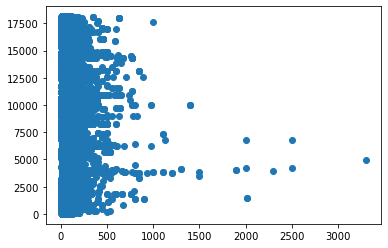

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

In [37]:
# for label, original_class in zip(encoded_y, y):
#     print('Original Class: ' + str(original_class))
#     print('Encoded Label: ' + str(label))
#     print('-' * 12)

In [38]:
# from keras.utils import to_categorical

# # Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)
# one_hot_y

In [39]:
newest = {
    'price': new_df['price'],
    'points': new_df['points'],
    'variety': encoded_variety.tolist(),
    'province': encoded_province.tolist(),
    'winery': encoded_winery.tolist()
    
}
newest


{'price': 0         235.0
 1         110.0
 2          90.0
 3          65.0
 4          66.0
           ...  
 258140     28.0
 258141     75.0
 258142     30.0
 258143     32.0
 258144     21.0
 Name: price, Length: 258145, dtype: float64,
 'points': 0         96
 1         96
 2         96
 3         96
 4         95
           ..
 258140    90
 258141    90
 258142    90
 258143    90
 258144    90
 Name: points, Length: 258145, dtype: int64,
 'variety': [82,
  643,
  543,
  466,
  489,
  643,
  643,
  643,
  466,
  466,
  195,
  466,
  466,
  613,
  466,
  130,
  82,
  618,
  294,
  466,
  519,
  620,
  643,
  130,
  466,
  130,
  466,
  466,
  466,
  593,
  338,
  130,
  584,
  130,
  534,
  503,
  534,
  534,
  500,
  341,
  425,
  440,
  500,
  593,
  500,
  534,
  82,
  534,
  82,
  534,
  130,
  543,
  466,
  130,
  82,
  506,
  93,
  500,
  294,
  466,
  294,
  130,
  476,
  593,
  130,
  82,
  466,
  82,
  82,
  466,
  462,
  476,
  466,
  130,
  543,
  82,
  405,
  466,
  

In [40]:
encoded_df = pd.DataFrame(data=newest)
encoded_df

,price,points,variety,province,winery
0,235.0,96,82,53,8956
1,110.0,96,643,294,1540
2,90.0,96,543,53,11101
3,65.0,96,466,303,13522
4,66.0,95,489,337,6645
...,...,...,...,...,...
258140,28.0,90,506,258,6983
258141,75.0,90,466,303,4992
258142,30.0,90,217,12,6235
258143,32.0,90,462,12,6335


In [41]:
# change target column to points to see how what factors contribute to points. same for cell below.
target = encoded_df["price"]

In [42]:
data = encoded_df.drop("price", axis=1)
feature_names = data.columns
data.head()

,points,variety,province,winery
0,96,82,53,8956
1,96,643,294,1540
2,96,543,53,11101
3,96,466,303,13522
4,95,489,337,6645


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [49]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

MemoryError: could not allocate 843055104 bytes

In [ ]:
# increase n_estimators to get a more accurate model.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [23]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.8325515722476169, 'winery'),
 (0.1024281470285771, 'variety'),
 (0.06502028072380592, 'points'),
 (0.0, 'province')]